In [91]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.endpoints import leaguedashplayerstats
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, DrawingArea
from matplotlib.patches import Circle


In [73]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/wg/8c_xwvyn2tl18ply9w25rmgm0000gn/T/ipykernel_46908/3777615979.py:1: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [74]:
plt.style.use('fivethirtyeight')


In [10]:
all_players = leagueleaders.LeagueLeaders(
    per_mode48='PerGame',
    season='2022-23',
    season_type_all_star='Regular Season',
    # stat_category_abbreviation='EFG'
).get_data_frames()[0]

In [13]:
# (2pt FGM + 1.5 * 3pt FGM) / FGA

all_players['EFG_PCT'] = (all_players['FGM'] + 1.5 * all_players['FG3M']) / all_players['FGA']

In [20]:
all_players = leaguedashplayerstats.LeagueDashPlayerStats(
    measure_type_detailed_defense='Advanced',
    per_mode_detailed='PerGame'
).get_data_frames()[0]

In [24]:
all_players.sort_values(by=['EFG_PCT'])

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK
472,1628425,Sterling Brown,Sterling,1610612747,LAL,28.0,4,2,2,0.500,...,537,2,3,3,517,534,526,534,524,534
14,1631214,Alondes Williams,Alondes,1610612751,BKN,23.0,1,1,0,1.000,...,402,155,55,55,539,534,538,534,538,534
470,1630649,Stanley Umude,Stanley,1610612765,DET,24.0,1,0,1,0.000,...,1,363,244,244,2,534,535,534,524,534
118,1629126,Deonte Burton,Deonte,1610612758,SAC,29.0,2,1,1,0.500,...,456,5,10,10,535,534,532,534,524,534
374,1630701,Michael Foster Jr.,Michael,1610612755,PHI,20.0,1,1,0,1.000,...,539,539,536,536,531,534,538,534,538,534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1629685,Dylan Windler,Dylan,1610612739,CLE,26.0,3,3,0,1.000,...,232,537,538,538,20,517,529,495,524,16
234,1630206,Jay Scrubb,Jay,1610612753,ORL,22.0,2,1,1,0.500,...,359,273,247,247,159,501,515,281,398,11
508,1628416,Tyler Dorsey,Tyler,1610612742,DAL,27.0,3,2,1,0.667,...,77,535,531,531,1,506,521,432,500,4
71,1629735,Chris Silva,Chris,1610612742,DAL,26.0,1,1,0,1.000,...,73,1,1,1,537,526,535,471,524,1


In [31]:
all_players[all_players['FGA'] > 1000].sort_values(by=['EFG_PCT'])

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,E_USG_PCT_RANK,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK
417,1631094,Paolo Banchero,Paolo,1610612753,ORL,20.0,72,31,41,0.431,...,40,251,335,335,142,47,33,67,51,373
484,1626179,Terry Rozier,Terry,1610612766,CHA,29.0,63,19,44,0.302,...,49,180,254,254,174,43,26,39,17,413
495,1629027,Trae Young,Trae,1610612737,ATL,24.0,73,38,35,0.521,...,11,54,70,70,41,18,6,32,16,363
432,1629628,RJ Barrett,RJ,1610612752,NYK,22.0,73,40,33,0.548,...,59,410,454,454,260,40,27,61,46,348
210,1630224,Jalen Green,Jalen,1610612745,HOU,21.0,76,20,56,0.263,...,32,255,337,337,209,26,10,48,28,405
155,1627832,Fred VanVleet,Fred,1610612761,TOR,29.0,69,34,35,0.493,...,103,432,477,477,116,64,38,74,45,455
458,1630567,Scottie Barnes,Scottie,1610612761,TOR,21.0,77,38,39,0.494,...,154,444,461,461,163,53,49,80,77,266
193,1629630,Ja Morant,Ja,1610612763,MEM,23.0,61,40,21,0.656,...,6,67,191,191,12,26,22,18,14,239
295,1629640,Keldon Johnson,Keldon,1610612759,SAS,23.0,63,17,46,0.270,...,38,128,264,264,162,42,37,36,31,281
267,1629673,Jordan Poole,Jordan,1610612744,GSW,23.0,82,44,38,0.537,...,28,60,81,81,160,30,17,66,50,360


In [32]:
all_players_without_rank = all_players[all_players.columns.drop(list(all_players.filter(regex='RANK')))]

In [36]:
for i, column in enumerate(all_players_without_rank.columns):
    print(i, column)

0 PLAYER_ID
1 PLAYER_NAME
2 NICKNAME
3 TEAM_ID
4 TEAM_ABBREVIATION
5 AGE
6 GP
7 W
8 L
9 W_PCT
10 MIN
11 E_OFF_RATING
12 OFF_RATING
13 sp_work_OFF_RATING
14 E_DEF_RATING
15 DEF_RATING
16 sp_work_DEF_RATING
17 E_NET_RATING
18 NET_RATING
19 sp_work_NET_RATING
20 AST_PCT
21 AST_TO
22 AST_RATIO
23 OREB_PCT
24 DREB_PCT
25 REB_PCT
26 TM_TOV_PCT
27 E_TOV_PCT
28 EFG_PCT
29 TS_PCT
30 USG_PCT
31 E_USG_PCT
32 E_PACE
33 PACE
34 PACE_PER40
35 sp_work_PACE
36 PIE
37 POSS
38 FGM
39 FGA
40 FGM_PG
41 FGA_PG
42 FG_PCT


In [60]:
# indices_columns_to_remove = [0, 2, 3]

# all_players_without_rank = all_players_without_rank.drop()

best_players = all_players_without_rank[all_players_without_rank['FGA'] > 500].sort_values(by=['EFG_PCT'])[-50:]
best_players

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PACE,PACE_PER40,sp_work_PACE,PIE,POSS,FGM,FGA,FGM_PG,FGA_PG,FG_PCT
534,1628380,Zach Collins,Zach,1610612759,SAS,25.0,63,20,43,0.317,...,104.06,86.71,104.06,0.110,3121,284,548,4.5,8.7,0.518
304,203484,Kentavious Caldwell-Pope,Kentavious,1610612743,DEN,30.0,76,51,25,0.671,...,100.61,83.84,100.61,0.066,4992,292,632,3.8,8.3,0.462
259,202685,Jonas Valanciunas,Jonas,1610612740,NOP,31.0,79,40,39,0.506,...,99.83,83.19,99.83,0.140,4101,446,816,5.6,10.3,0.547
38,202711,Bojan Bogdanovic,Bojan,1610612765,DET,34.0,59,15,44,0.254,...,101.18,84.32,101.18,0.116,3988,430,882,7.3,14.9,0.488
172,1628960,Grayson Allen,Grayson,1610612749,MIL,27.0,72,53,19,0.736,...,102.56,85.47,102.56,0.078,4224,245,557,3.4,7.7,0.440
85,1626156,D'Angelo Russell,D'Angelo,1610612747,LAL,27.0,71,39,32,0.549,...,101.24,84.36,101.24,0.115,4864,445,948,6.3,13.4,0.469
292,202695,Kawhi Leonard,Kawhi,1610612746,LAC,31.0,52,33,19,0.635,...,98.65,82.21,98.65,0.159,3592,446,871,8.6,16.8,0.512
132,1628378,Donovan Mitchell,Donovan,1610612739,CLE,26.0,68,44,24,0.647,...,96.89,80.74,96.89,0.149,4932,679,1402,10.0,20.6,0.484
327,202681,Kyrie Irving,Kyrie,1610612742,DAL,31.0,60,32,28,0.533,...,98.47,82.06,98.47,0.146,4599,594,1203,9.9,20.1,0.494
166,203507,Giannis Antetokounmpo,Giannis,1610612749,MIL,28.0,63,47,16,0.746,...,103.63,86.36,103.63,0.204,4380,707,1278,11.2,20.3,0.553


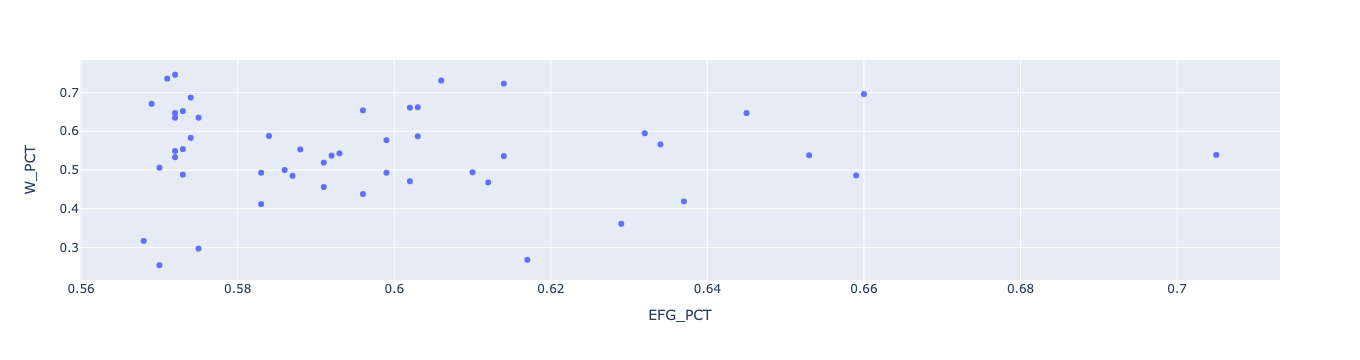

In [62]:
px.scatter(best_players, x=best_players['EFG_PCT'], y=best_players['W_PCT'], hover_data=['PLAYER_NAME'])

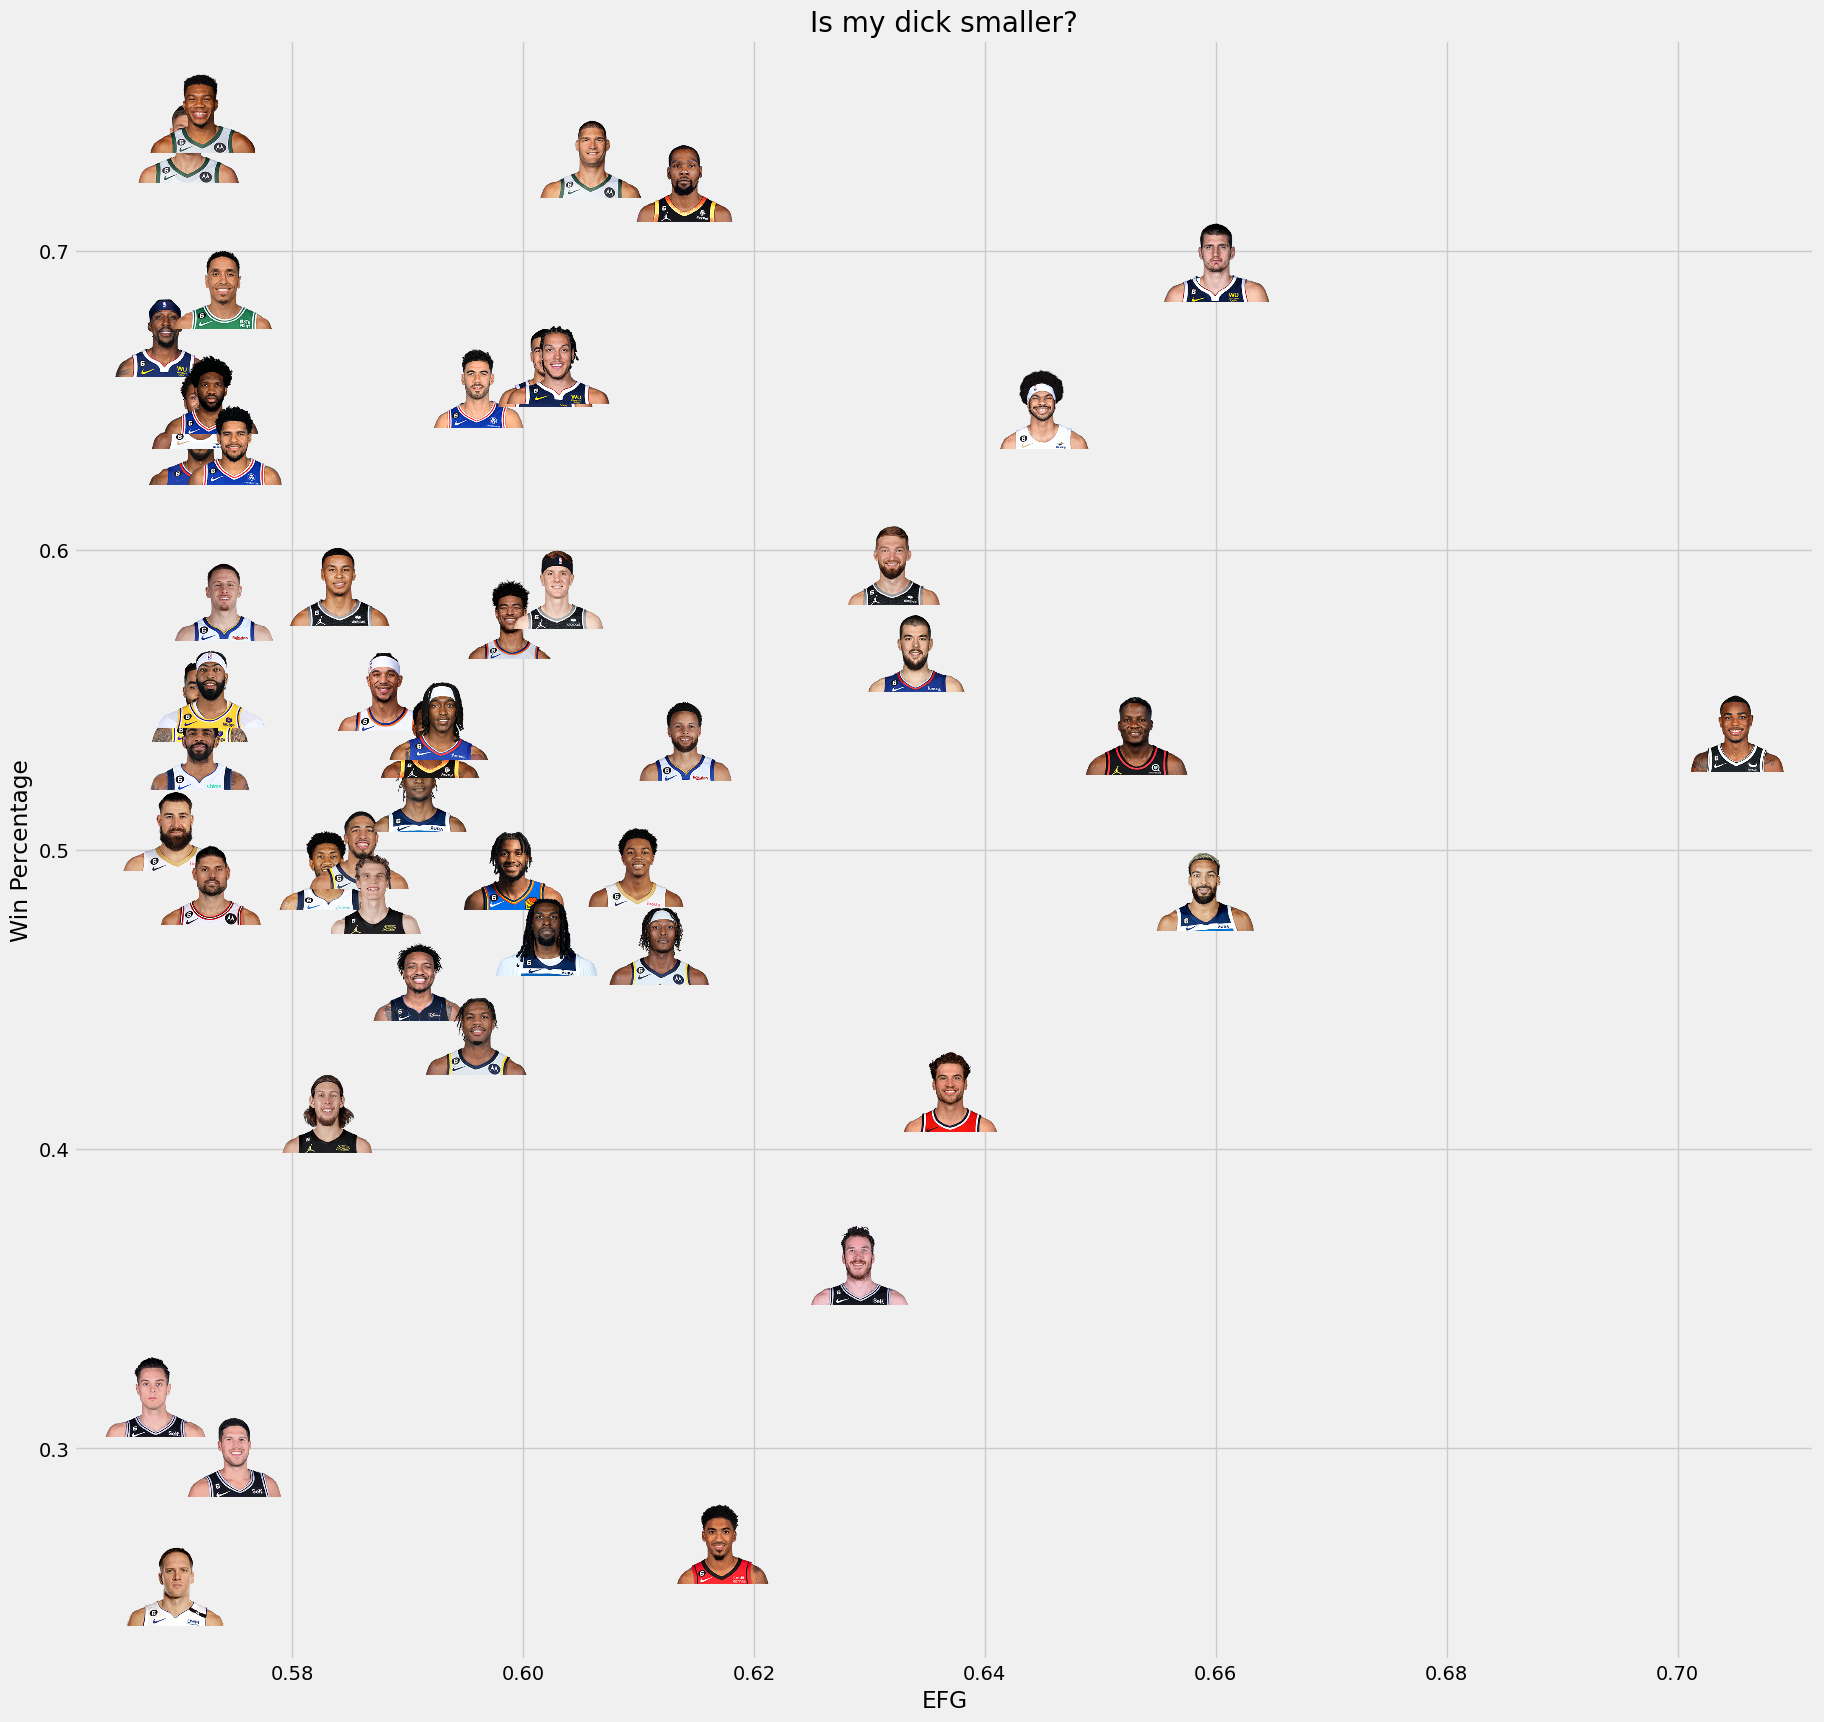

In [104]:
zoom = 0.3
player_root_dir = 'player_imgs/'

def get_player_img(player_id):
    #print(path)
    return OffsetImage(plt.imread(f'{player_root_dir}{player_id}.png'), zoom=zoom)

fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(best_players['EFG_PCT'], y=best_players['W_PCT'], s=10)

# plt.show()

for i in range(len(best_players)):
    item = best_players.iloc[i]
    ab = AnnotationBbox(get_player_img(item.PLAYER_ID), (item.EFG_PCT, item.W_PCT), frameon=False)
    ax.add_artist(ab)
    # print(item)
    

ax.set_xlabel("EFG")
ax.set_ylabel("Win Percentage")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Is my dick smaller?")

# plt.savefig('efg_wpct_ratio.png')

In [114]:
from nba_api.stats.endpoints import leaguedashptstats 

players = leagueleaders.LeagueLeaders(
    per_mode48='PerGame',
    season='2022-23',
    season_type_all_star='Regular Season',
).get_data_frames()[0]

players

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,203954,1,Joel Embiid,1610612755,PHI,66,34.6,11.0,20.1,0.548,...,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,33.1,35.9
1,1629029,2,Luka Doncic,1610612742,DAL,66,36.2,10.9,22.0,0.496,...,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,32.4,33.5
2,203081,3,Damian Lillard,1610612757,POR,58,36.3,9.6,20.7,0.463,...,0.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,32.2,30.2
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.5,10.4,20.3,0.510,...,0.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,31.4,30.5
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.1,11.2,20.3,0.553,...,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,31.1,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,200782,241,P.J. Tucker,1610612755,PHI,75,25.6,1.3,3.0,0.427,...,0.826,1.3,2.7,3.9,0.8,0.5,0.2,0.6,3.5,6.6
241,1630540,242,Miles McBride,1610612752,NYK,64,11.9,1.2,3.4,0.358,...,0.667,0.2,0.6,0.8,1.1,0.6,0.1,0.4,3.5,3.3
242,1630264,243,Anthony Gill,1610612764,WAS,59,10.6,1.2,2.2,0.538,...,0.731,0.6,1.1,1.7,0.6,0.1,0.2,0.3,3.3,4.3
243,1631132,244,Christian Koloko,1610612761,TOR,58,13.8,1.2,2.6,0.480,...,0.627,1.4,1.5,2.9,0.5,0.4,1.0,0.3,3.1,5.9


In [115]:
for column in players.columns:
    print(column)

PLAYER_ID
RANK
PLAYER
TEAM_ID
TEAM
GP
MIN
FGM
FGA
FG_PCT
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
STL
BLK
TOV
PTS
EFF


In [125]:
players['COMBINED'] = players['PTS'] + players['REB'] + players['AST']

players

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,COMBINED
0,203954,1,Joel Embiid,1610612755,PHI,66,34.6,11.0,20.1,0.548,...,1.7,8.4,10.2,4.2,1.0,1.7,3.4,33.1,35.9,47.5
1,1629029,2,Luka Doncic,1610612742,DAL,66,36.2,10.9,22.0,0.496,...,0.8,7.8,8.6,8.0,1.4,0.5,3.6,32.4,33.5,49.0
2,203081,3,Damian Lillard,1610612757,POR,58,36.3,9.6,20.7,0.463,...,0.8,4.0,4.8,7.3,0.9,0.3,3.3,32.2,30.2,44.3
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.5,10.4,20.3,0.510,...,0.9,4.0,4.8,5.5,1.6,1.0,2.8,31.4,30.5,41.7
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.1,11.2,20.3,0.553,...,2.2,9.6,11.8,5.7,0.8,0.8,3.9,31.1,32.9,48.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,200782,241,P.J. Tucker,1610612755,PHI,75,25.6,1.3,3.0,0.427,...,1.3,2.7,3.9,0.8,0.5,0.2,0.6,3.5,6.6,8.2
241,1630540,242,Miles McBride,1610612752,NYK,64,11.9,1.2,3.4,0.358,...,0.2,0.6,0.8,1.1,0.6,0.1,0.4,3.5,3.3,5.4
242,1630264,243,Anthony Gill,1610612764,WAS,59,10.6,1.2,2.2,0.538,...,0.6,1.1,1.7,0.6,0.1,0.2,0.3,3.3,4.3,5.6
243,1631132,244,Christian Koloko,1610612761,TOR,58,13.8,1.2,2.6,0.480,...,1.4,1.5,2.9,0.5,0.4,1.0,0.3,3.1,5.9,6.5


In [126]:
merged_stats = pd.merge(players, all_players, on="PLAYER_ID")

for column in merged_stats.columns:
    print(column)

PLAYER_ID
RANK
PLAYER
TEAM_ID_x
TEAM
GP_x
MIN_x
FGM_x
FGA_x
FG_PCT_x
FG3M
FG3A
FG3_PCT
FTM
FTA
FT_PCT
OREB
DREB
REB
AST
STL
BLK
TOV
PTS
EFF
COMBINED
PLAYER_NAME
NICKNAME
TEAM_ID_y
TEAM_ABBREVIATION
AGE
GP_y
W
L
W_PCT
MIN_y
E_OFF_RATING
OFF_RATING
sp_work_OFF_RATING
E_DEF_RATING
DEF_RATING
sp_work_DEF_RATING
E_NET_RATING
NET_RATING
sp_work_NET_RATING
AST_PCT
AST_TO
AST_RATIO
OREB_PCT
DREB_PCT
REB_PCT
TM_TOV_PCT
E_TOV_PCT
EFG_PCT
TS_PCT
USG_PCT
E_USG_PCT
E_PACE
PACE
PACE_PER40
sp_work_PACE
PIE
POSS
FGM_y
FGA_y
FGM_PG
FGA_PG
FG_PCT_y
GP_RANK
W_RANK
L_RANK
W_PCT_RANK
MIN_RANK
E_OFF_RATING_RANK
OFF_RATING_RANK
sp_work_OFF_RATING_RANK
E_DEF_RATING_RANK
DEF_RATING_RANK
sp_work_DEF_RATING_RANK
E_NET_RATING_RANK
NET_RATING_RANK
sp_work_NET_RATING_RANK
AST_PCT_RANK
AST_TO_RANK
AST_RATIO_RANK
OREB_PCT_RANK
DREB_PCT_RANK
REB_PCT_RANK
TM_TOV_PCT_RANK
E_TOV_PCT_RANK
EFG_PCT_RANK
TS_PCT_RANK
USG_PCT_RANK
E_USG_PCT_RANK
E_PACE_RANK
PACE_RANK
sp_work_PACE_RANK
PIE_RANK
FGM_RANK
FGA_RANK
FGM_PG_RANK
FGA

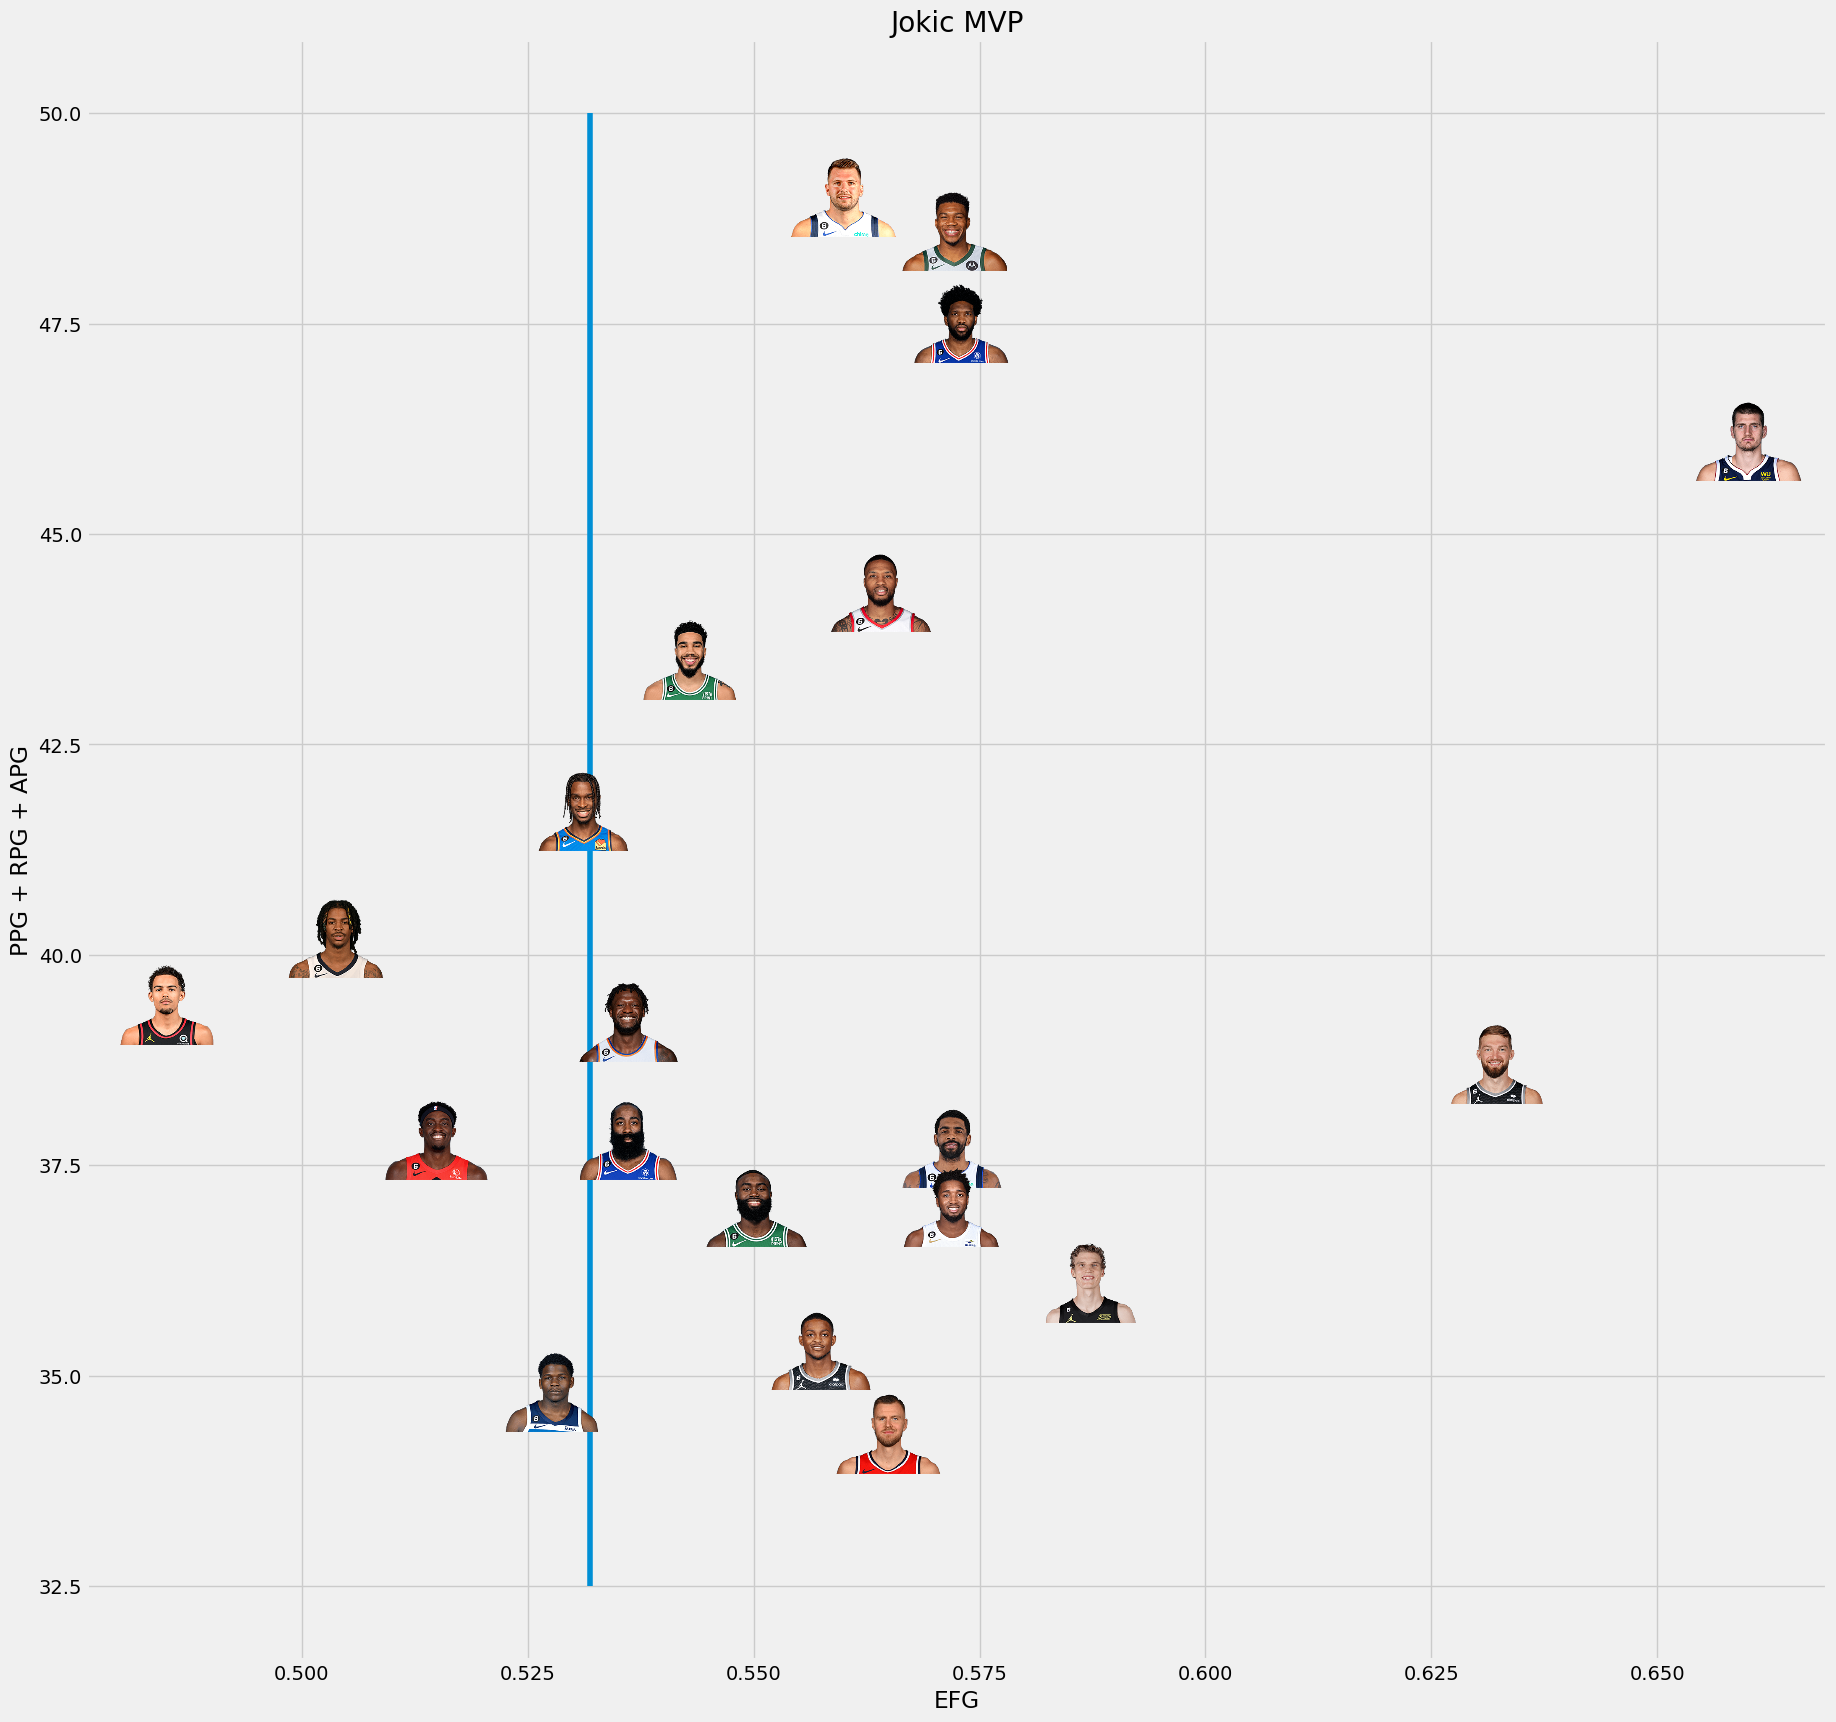

In [153]:
# plt.scatter(merged_stats['EFG_PCT'], merged_stats['COMBINED'])

best_merged_stats = merged_stats.sort_values(by=['COMBINED'], ascending=False)[:20]

fig, ax = plt.subplots(figsize=(20, 20))

ax.scatter(best_merged_stats['EFG_PCT'], y=best_merged_stats['COMBINED'], s=10)
ax.plot([0.5318794063079777, 0.5318794063079777], [32.5, 50])

# plt.show()

for i in range(len(best_merged_stats)):
    item = best_merged_stats.iloc[i]
    try:
        ab = AnnotationBbox(get_player_img(item.PLAYER_ID), (item.EFG_PCT, item.COMBINED), frameon=False)
        ax.add_artist(ab)
    except:
        print(best_merged_stats.PLAYER_NAME)
    # print(item)
    

ax.set_xlabel("EFG")
ax.set_ylabel("PPG + RPG + APG")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Jokic MVP")

plt.savefig('kralj_efikasnosti.png')

In [156]:
all_players['EFG_PCT'].mean()

0.5318794063079777